In [1]:
import os
import sv as SV
import numpy as np 
import astropy.table as atable
from tqdm.notebook import tqdm, trange

from desitarget.cuts import unextinct_fluxes
from desitarget.sv1.sv1_targetmask import bgs_mask as sv1_bgs_mask
from desitarget.sv3.sv3_targetmask import bgs_mask as sv3_bgs_mask

In [2]:
# -- plotting -- 
import matplotlib as mpl
import matplotlib.pyplot as plt
#mpl.use('Agg')
#mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['axes.linewidth'] = 1.5
mpl.rcParams['axes.xmargin'] = 1
mpl.rcParams['xtick.labelsize'] = 'x-large'
mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['xtick.major.width'] = 1.5
mpl.rcParams['ytick.labelsize'] = 'x-large'
mpl.rcParams['ytick.major.size'] = 5
mpl.rcParams['ytick.major.width'] = 1.5
mpl.rcParams['legend.frameon'] = False

In [3]:
# load compiled zsuccess rates to file
dat_dir = '/global/cscratch1/sd/chahah/bgs-cmxsv/sv-paper/'

sv1_gals = atable.Table.read(os.path.join(dat_dir, 'sv1.bgs_exps.efftime160_200.zsuccess.fits'))
sv3_gals = atable.Table.read(os.path.join(dat_dir, 'sv3.bgs_exps.efftime160_200.zsuccess.fits'))
main_gals = atable.Table.read(os.path.join(dat_dir, 'main.bgs_exps.efftime160_200.zsuccess.fits'))

(0.0, 20000.0)

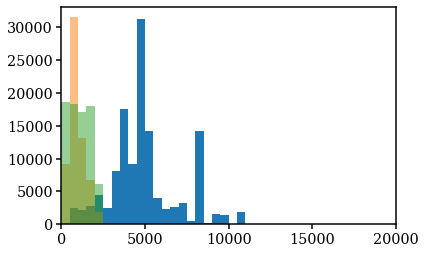

In [4]:
plt.hist(sv1_gals['DEEP_EXPTIME'], range=(0., 2e4), bins=40)
plt.hist(sv3_gals['DEEP_EXPTIME'], range=(0., 2e4), bins=40, alpha=0.5)
plt.hist(main_gals['DEEP_EXPTIME'], range=(0., 2e4), bins=40, alpha=0.5)
plt.xlim(0., 2e4)

(0.0, 20.0)

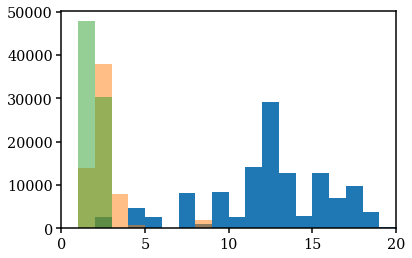

In [5]:
plt.hist(sv1_gals['DEEP_NUMEXP'], range=(0., 20), bins=20)
plt.hist(sv3_gals['DEEP_NUMEXP'], range=(0., 20), bins=20, alpha=0.5)
plt.hist(main_gals['DEEP_NUMEXP'], range=(0., 20), bins=20, alpha=0.5)
plt.xlim(0., 20)

In [6]:
sv1_deep = (sv1_gals['DEEP_EXPTIME'] > 2000)
sv1_gmag = 22.5 - 2.5 * np.log10(sv1_gals['FLUX_G'].clip(1e-16))
sv1_rmag = 22.5 - 2.5 * np.log10(sv1_gals['FLUX_R'].clip(1e-16))
sv1_zmag = 22.5 - 2.5 * np.log10(sv1_gals['FLUX_Z'].clip(1e-16))
sv1_rfib = 22.5 - 2.5 * np.log10(sv1_gals['FIBERFLUX_R'].clip(1e-16))
sv1_w1   = 22.5 - 2.5 * np.log10(sv1_gals['FLUX_W1'].clip(1e-16))
sv1_brgt = (sv1_gals['SV1_BGS_TARGET'] & sv1_bgs_mask['BGS_BRIGHT']) != 0 
sv1_lowq = (sv1_gals['SV1_BGS_TARGET'] & sv1_bgs_mask['BGS_LOWQ']) != 0 
sv1_fain = (sv1_gals['SV1_BGS_TARGET'] & sv1_bgs_mask['BGS_FAINT']) != 0

sv3_deep = (sv3_gals['DEEP_NUMEXP'] > 2)
print(np.sum(sv3_deep))
sv3_gmag = 22.5 - 2.5 * np.log10(sv3_gals['FLUX_G'].clip(1e-16))
sv3_rmag = 22.5 - 2.5 * np.log10(sv3_gals['FLUX_R'].clip(1e-16))
sv3_zmag = 22.5 - 2.5 * np.log10(sv3_gals['FLUX_Z'].clip(1e-16))
sv3_rfib = 22.5 - 2.5 * np.log10(sv3_gals['FIBERFLUX_R'].clip(1e-16))
sv3_w1   = 22.5 - 2.5 * np.log10(sv3_gals['FLUX_W1'].clip(1e-16))
sv3_brgt = (sv3_gals['SV3_BGS_TARGET'] & sv3_bgs_mask['BGS_BRIGHT']) != 0 
sv3_fain = (sv3_gals['SV3_BGS_TARGET'] & sv3_bgs_mask['BGS_FAINT']) != 0 

10635


(0.6, 1.08)

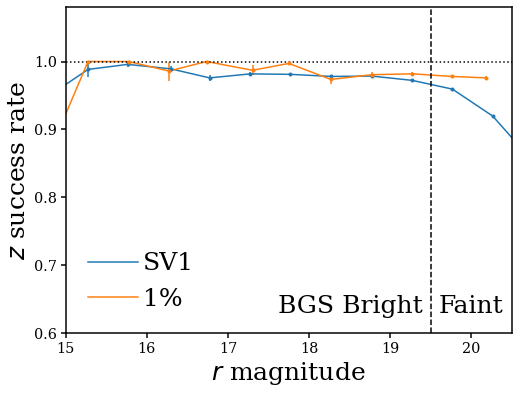

In [197]:
fig = plt.figure(figsize=(8,6))
sub = fig.add_subplot(111)

rmid, zsrate, err_zsrate = SV.zsuccess_rate(sv1_rmag[sv1_deep & ~sv1_lowq], sv1_gals['ZSUCCESS'][sv1_deep & ~sv1_lowq], range=(12, 22), nbins=20)
sub.errorbar(rmid, zsrate, yerr=err_zsrate, fmt='.C0')
sub.plot(rmid, zsrate, c='C0', label='SV1')

rmid, zsrate, err_zsrate = SV.zsuccess_rate(sv3_rmag[sv3_deep], sv3_gals['ZSUCCESS'][sv3_deep], range=(12, 22), nbins=20)
sub.errorbar(rmid, zsrate, yerr=err_zsrate, fmt='.C1')
sub.plot(rmid, zsrate, c='C1', label='1%')

sub.axhline(1., color='k', linestyle=':')
sub.axvline(19.5, color='k', linestyle='--')
sub.text(19.4, 0.63, 'BGS Bright', ha='right', fontsize=25, rotation=0)
sub.text(19.6, 0.63, 'Faint', ha='left', fontsize=25, rotation=0)

sub.legend(loc='lower left', fontsize=25, handletextpad=0.2)
sub.set_xlabel('$r$ magnitude', fontsize=25)
sub.set_xlim(15, 20.5)
sub.set_ylabel('$z$ success rate', fontsize=25)
sub.set_ylim(0.6, 1.08)

(16.0, 26.0)

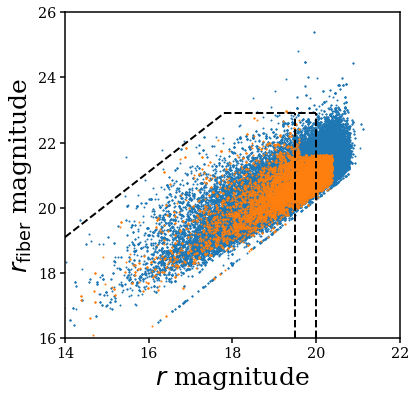

In [103]:
fig = plt.figure(figsize=(6,6))
sub = fig.add_subplot(111)

sub.scatter(sv1_rmag[sv1_deep & ~lowq], sv1_rfib[sv1_deep & ~lowq], c='C0', s=1)
sub.scatter(sv3_rmag[sv3_deep], sv3_rfib[sv3_deep], c='C1', s=1)

sub.plot([14, 17.8], [19.1, 22.9], c='k', ls='--', lw=2)
sub.plot([17.8, 20.0], [22.9, 22.9], c='k', ls='--', lw=2)
sub.plot([19.5, 19.5], [16., 22.9], c='k', ls='--', lw=2)
sub.plot([20., 20.], [16., 22.9], c='k', ls='--', lw=2)

sub.set_xlabel('$r$ magnitude', fontsize=25)
sub.set_xlim(14, 22)
sub.set_ylabel(r'$r_{\rm fiber}$ magnitude', fontsize=25)
sub.set_ylim(16, 26)

Text(0, 0.5, '$z$ success rate')

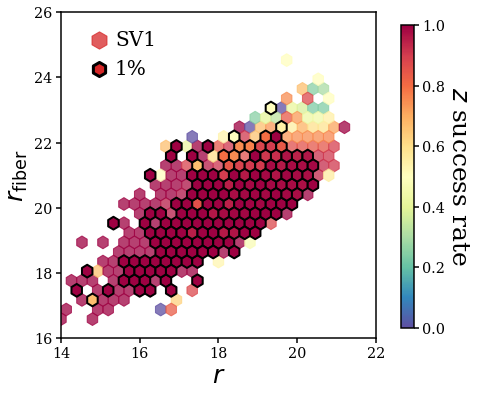

In [165]:
fig = plt.figure(figsize=(7,6))
sub = fig.add_subplot(111)

hb = sub.hexbin(sv1_rmag[sv1_deep & ~sv1_lowq], sv1_rfib[sv1_deep & ~sv1_lowq], C=sv1_gals['ZSUCCESS'][sv1_deep & ~sv1_lowq].astype(float), 
                reduce_C_function=np.mean, extent=(14, 22, 16, 26), gridsize=30, vmin=0., vmax=1., mincnt=2, cmap='Spectral_r', 
                alpha=0.75)

hb = sub.hexbin(sv3_rmag[sv3_deep], sv3_rfib[sv3_deep], C=sv3_gals['ZSUCCESS'][sv3_deep].astype(float), edgecolors='k', linewidth=2.,
                reduce_C_function=np.mean, extent=(14, 22, 16, 26), gridsize=30, vmin=0., vmax=1., mincnt=2, cmap='Spectral_r')

sub.scatter([], [], marker='h', s=300, label='SV1', c='C3', alpha=0.75)
sub.scatter([], [], marker='h', s=200, label='1%', linewidth=3, c='C3', edgecolor='k')

sub.legend(loc='upper left', fontsize=20, handletextpad=-0.2)
#sub.text(14.5, 20.3, 'fiber-magnitude cut', rotation=39, fontsize=15)
#sub.plot([14, 17.8], [19.1, 22.9], c='k', ls='--', lw=3)
#sub.plot([17.8, 20.0], [22.9, 22.9], c='k', ls='--', lw=3)
#sub.plot([20., 22.], [22.9, 24.9], c='k', ls='--', lw=3)

#sub.plot([19.5, 19.5], [16., 22.9], c='k', ls='--', lw=2)
#sub.plot([20., 20.], [16., 22.9], c='k', ls='--', lw=2)

sub.set_xlabel('$r$', fontsize=25)
sub.set_xlim(14, 22)
sub.set_ylabel(r'$r_{\rm fiber}$', fontsize=25)
sub.set_ylim(16, 26)

fig.subplots_adjust(wspace=0.1, right=0.75)

cbar_ax = fig.add_axes([0.8, 0.15, 0.025, 0.7])
cbar = fig.colorbar(hb2, cax=cbar_ax)
cbar.ax.set_ylabel(r'$z$ success rate', labelpad=25, fontsize=25, rotation=270)

Text(0, 0.5, '$z$ success rate')

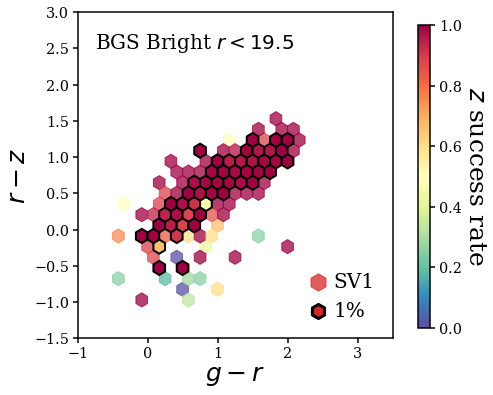

In [167]:
fig = plt.figure(figsize=(7,6))
sub = fig.add_subplot(111)

hb = sub.hexbin((sv1_gmag - sv1_rmag)[sv1_deep & sv1_bright], (sv1_rmag - sv1_zmag)[sv1_deep & sv1_bright], C=sv1_gals['ZSUCCESS'][sv1_deep & sv1_bright].astype(float), 
                reduce_C_function=np.mean, extent=(-1, 4, -2, 3), gridsize=30, vmin=0., vmax=1., mincnt=2,
                cmap='Spectral_r', alpha=0.75)

hb = sub.hexbin((sv3_gmag - sv3_rmag)[sv3_deep & sv3_brgt], (sv3_rmag - sv3_zmag)[sv3_deep & sv3_brgt], C=sv3_gals['ZSUCCESS'][sv3_deep & sv3_brgt].astype(float), edgecolors='k', linewidth=2.,
                reduce_C_function=np.mean, extent=(-1, 4, -2, 3), gridsize=30, vmin=0., vmax=1., mincnt=2, cmap='Spectral_r')

sub.scatter([], [], marker='h', s=300, label='SV1', c='C3', alpha=0.75)
sub.scatter([], [], marker='h', s=200, label='1%', linewidth=3, c='C3', edgecolor='k')

sub.text(-0.75, 2.5, 'BGS Bright $r < 19.5$', fontsize=20)
sub.legend(loc='lower right', fontsize=20, handletextpad=-0.2)

sub.set_xlabel('$g - r$', fontsize=25)
sub.set_xlim(-1, 3.5)
sub.set_ylabel(r'$r - z$', fontsize=25)
sub.set_ylim(-1.5, 3)

fig.subplots_adjust(wspace=0.1, right=0.75)

cbar_ax = fig.add_axes([0.8, 0.15, 0.025, 0.7])
cbar = fig.colorbar(hb2, cax=cbar_ax)
cbar.ax.set_ylabel(r'$z$ success rate', labelpad=25, fontsize=25, rotation=270)

In [169]:
sv1_fibcol = (sv1_zmag - sv1_w1) - 3/2.5 * (sv1_gmag - sv1_rmag) + 1.2
sv3_fibcol = (sv3_zmag - sv3_w1) - 3/2.5 * (sv3_gmag - sv3_rmag) + 1.2

Text(0, 0.5, '$z$ success rate')

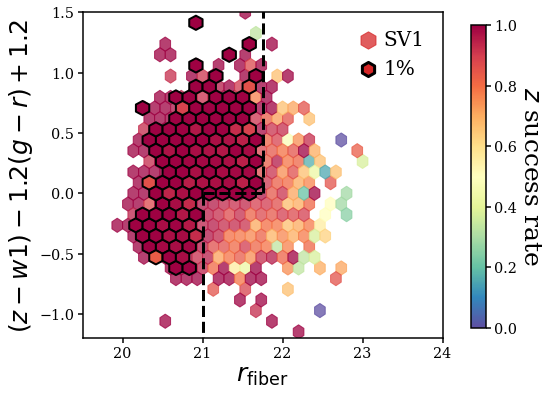

In [191]:
fig = plt.figure(figsize=(8,6))
sub = fig.add_subplot(111)

hb = sub.hexbin(sv1_rfib[sv1_deep & sv1_fain], sv1_fibcol[sv1_deep & sv1_fain], C=sv1_gals['ZSUCCESS'][sv1_deep & sv1_fain].astype(float),
                reduce_C_function=np.mean, extent=(19., 23., -1.5, 1.5), gridsize=30, vmin=0., vmax=1., mincnt=5,
                cmap='Spectral_r', alpha=0.75)

hb = sub.hexbin(sv3_rfib[sv3_deep & sv3_fain], sv3_fibcol[sv3_deep & sv3_fain], C=sv3_gals['ZSUCCESS'][sv3_deep & sv3_fain].astype(float),
                reduce_C_function=np.mean, extent=(19., 24., -1.5, 1.5), gridsize=30, vmin=0., vmax=1., mincnt=5,
                cmap='Spectral_r', edgecolors='k', linewidth=2.)

sub.scatter([], [], marker='h', s=300, label='SV1', c='C3', alpha=0.75)
sub.scatter([], [], marker='h', s=200, label='1%', linewidth=3, c='C3', edgecolor='k')

sub.plot([21, 21], [-2, 0.], c='k', ls='--', lw=3)
sub.plot([21, 21.75], [0., 0.], c='k', ls='--', lw=3)
sub.plot([21.75, 21.75], [0., 2.], c='k', ls='--', lw=3)

sub.legend(loc='upper right', fontsize=20, handletextpad=-0.2)

sub.set_ylabel('$(z - w1) - 1.2 (g - r) + 1.2$', fontsize=25)
sub.set_yticks([-1., -0.5, 0., 0.5, 1., 1.5])
sub.set_ylim(-1.2, 1.5)
sub.set_xlabel(r'$r_{\rm fiber}$', fontsize=25)
sub.set_xlim(19.5, 24)


fig.subplots_adjust(wspace=0.1, right=0.75)

cbar_ax = fig.add_axes([0.8, 0.15, 0.025, 0.7])
cbar = fig.colorbar(hb2, cax=cbar_ax)
cbar.ax.set_ylabel(r'$z$ success rate', labelpad=25, fontsize=25, rotation=270)